[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a. categorical: European airlines

b. quantitative: ages of STAT 220 students

c. discrete: number of students in a class

d. continuous: height of freshmen students

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")
from sklearn.linear_model import LinearRegression


Part a. Construct a histogram of CO2 emissions.

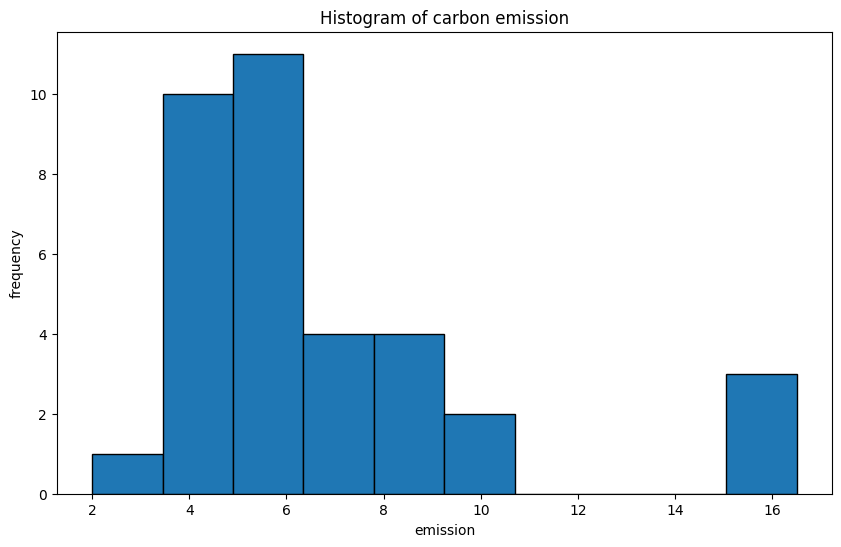

In [2]:
plt.figure(figsize=(10, 6))
plt.hist(carbon_west["CO2"], bins=10, edgecolor='black')
plt.title(f'Histogram of carbon emission')
plt.xlabel("emission")
plt.ylabel('frequency')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [3]:
mean = np.mean(carbon_west["CO2"])
median = np.median(carbon_west['CO2'])
stan_dev = np.std(carbon_west['CO2'])


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [4]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [5]:
states_without_dc = murders[murders['state'] != "DC"]
m_mean = np.mean(states_without_dc['murder'])
m_stdv = np.std(states_without_dc['murder'])


Part b. Find the five-number  summary without D.C.

In [6]:
states_without_dc = murders[murders['state'] != "DC"]

minimum = np.min(states_without_dc["murder"])
q1 = np.percentile(states_without_dc["murder"], 25)
median = np.median(states_without_dc["murder"])
q3 = np.percentile(states_without_dc["murder"], 75)
maximum = np.max(states_without_dc["murder"])


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [7]:
m_mean = np.mean(murders['murder'])
m_stdv = np.std(murders['murder'])

minimum = np.min(murders['murder'])
q1 = np.percentile(murders['murder'], 25)
median = np.median(murders['murder'])
q3 = np.percentile(murders['murder'], 75)
maximum = np.max(murders['murder'])



**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [8]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

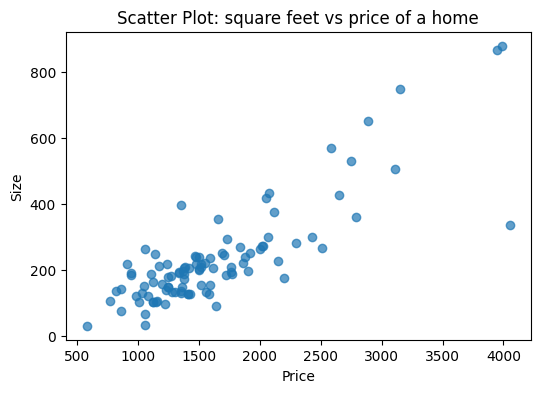

In [9]:
plt.figure(figsize=(6, 4))
plt.scatter(houses['size'], houses['price'], alpha=0.7)
plt.title('Scatter Plot: square feet vs price of a home')
plt.xlabel('Price')
plt.ylabel('Size')

plt.show()

Part b. Find the correlation between the two variables.

In [10]:
correlation = houses['size'].corr(houses['price'])


Part c. Find and plot the regression line on top of the scatterplot.

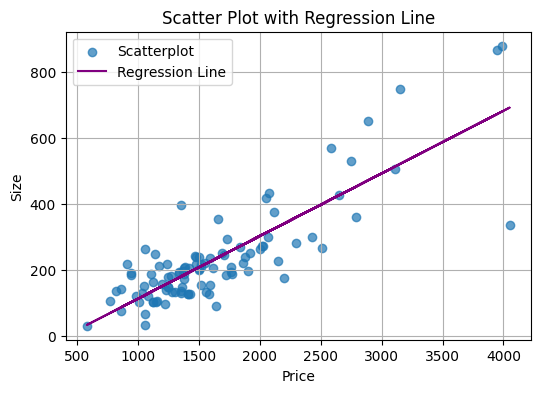

In [11]:
x = houses[['size']]
y = houses['price']

regression = LinearRegression()

regression.fit(x,y)

slope_of_regline = regression.coef_[0]
intercept_of_regline = regression.intercept_

plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, label='Scatterplot')

plt.plot(x, regression.predict(x), color='purple', label='Regression Line')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Price')
plt.ylabel('Size')
plt.legend()
plt.grid(True)
plt.show()


Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 500x1000 with 0 Axes>

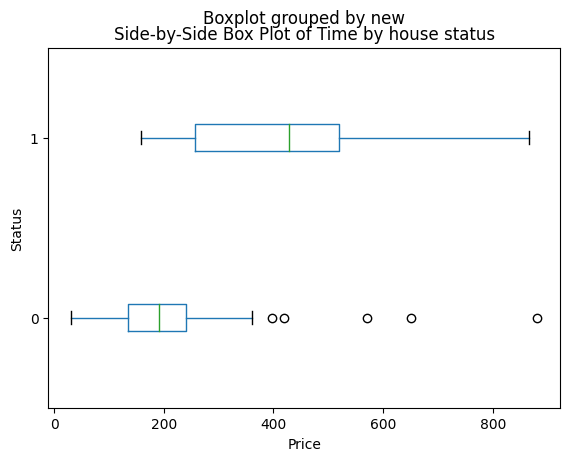

In [12]:
plt.figure(figsize=(5, 10))
houses.boxplot(column='price', by='new', vert=False ,grid = False)
plt.title('Side-by-Side Box Plot of Time by house status')
plt.xlabel('Price')
plt.ylabel('Status')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

1. The relationship between size and price is positively linear as the price of houses increases with the size as shown in the graph by the regression line.
2. Based on the box plot, the price of houses increases with the status of the house whether it's new or not with a few exceptions.


**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [31]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep="\\s+")


,subject,happiness,marital,gender
0,1,1,1,male
1,2,1,1,male
2,3,1,1,male
3,4,1,1,male
4,5,1,1,male
...,...,...,...,...
2137,2138,3,3,female
2138,2139,3,3,female
2139,2140,3,3,female
2140,2141,3,3,female


In [32]:
pd.crosstab(happy["happiness"],happy["marital"])

marital,1,2,3
happiness,,,
1,432,92,124
2,504,282,409
3,61,103,135
